In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns

In [2]:
#Ob_set is the Obesity set of date. It has the obesity rates from 2004 - 2012 per county
#Lets load in the data toutilize it further
#"number yyyy" is the percentage of obese idividuals based on the surverys done each year for the entire county
Ob_set = pd.read_excel("OB_PREV_ALL_STATES.xlsx", "obesity")

In [3]:
#Remove all the extra data in the Obesity list to leave just the numbers and % obese per county
for col in Ob_set.columns[4:]:
    if 'number' not in col and 'percent' not in col or 'age' in col:
        del Ob_set[col]

In [4]:
#make a new column in FarmMkt and Ob_set to be a key to match the county/state pair
#Ob_set['CSKey'] = Ob_set[['County','State']].sum(axis=1)

In [5]:
FoodSecRest = pd.read_excel("FoodSecAllup.xls", 'RESTAURANTS')
FoodQGuide = pd.read_excel("FoodSecAllup.xls", 'Variable List')

In [6]:
#Bring in the Food Security factors to be utilized against the obesity rate data
#GrocStore is the set of food stores in the US
#Pull in the data to find the grocery and supercenters

FoodSecStore = pd.read_excel("FoodSecAllup.xls", 'STORES')

#drop the unwanted columsn - most data from 07 since we are using the obesity rates from 2012
FoodSecStore = FoodSecStore.drop('GROC07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_GROC_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('GROCPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_GROCPTH_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SUPERC07', axis=1)
FoodSecStore = FoodSecStore.drop('SUPERCPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('CONVS07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_CONVS_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('CONVSPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_CONVSPTH_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SPECS07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SPECS_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SPECSPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SPECSPTH_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SNAPS08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SNAPS_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('SNAPSPTH08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SNAPSPTH_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('WICS08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_WICS_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('WICSPTH08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_WICSPTH_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SUPERC_07_12',axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SUPERCPTH_07_12',axis=1)

#make a new column in FarmMkt and Ob_set to be a key to match the county/state pair`b
#FoodSecStore['CSKey'] = FoodSecStore[['County','State']].sum(axis=1)

In [7]:
FoodSecStore.head()

,FIPS,State,County,GROC12,GROCPTH12,SUPERC12,SUPERCPTH12,CONVS12,CONVSPTH12,SPECS12,SPECSPTH12,SNAPS12,SNAPSPTH12,WICS12,WICSPTH12
0,1001,Alabama,Autauga,4,0.072054,1,0.018013,34,0.612458,0,0.000000,37.416667,0.674004,5,0.090067
1,1003,Alabama,Baldwin,26,0.136275,6,0.031448,108,0.566067,23,0.120551,138.333333,0.725055,27,0.141517
2,1005,Alabama,Barbour,5,0.183817,1,0.036763,19,0.698504,3,0.110290,34.833333,1.280590,7,0.257344
3,1007,Alabama,Bibb,5,0.221268,1,0.044254,17,0.752312,1,0.044254,16.250000,0.719122,5,0.221268
4,1009,Alabama,Blount,8,0.138346,1,0.017293,28,0.484211,0,0.000000,38.000000,0.657144,6,0.103760


In [8]:
Ob_set.head()

,State,FIPS Codes,County,number 2004,percent 2004,number 2005,percent 2005,number 2006,percent 2006,number 2007,...,number 2008,percent 2008,number 2009,percent 2009,number 2010,percent 2010,number 2011,percent 2011,number 2012,percent 2012
0,Alabama,1001,Autauga,10180,30.2,10050,28.87,9912,27.9,10640,...,11350,31.5,12024,34.1,11761,30.5,12340,31.3,12184,30.9
1,Alabama,1003,Baldwin,30120,25.7,30710,25.11,30460,23.9,31240,...,33960,26.2,34244,25.5,36348,26.6,35005,25.0,38245,26.7
2,Alabama,1005,Barbour,6645,31.7,6972,33.04,7595,36.5,7591,...,8240,37.6,8264,37.0,7743,37.3,8021,38.4,8482,40.8
3,Alabama,1007,Bibb,4605,29.3,4910,30.79,4972,31.3,5062,...,5200,32.3,5460,34.0,5884,34.3,6423,37.3,6926,40.1
4,Alabama,1009,Blount,10330,25.5,11450,27.67,12080,28.9,13120,...,13530,31.9,13759,32.0,12690,30.4,13073,30.9,13789,32.4


In [9]:
#merge the Grocery store per 1000 pop (GROCPTH12), super senters per 1000 (SUPERCPTH12), 
#convenice stores per 1000 (CONVSPTH12), specialty stores per 1000 pop (SPECSPTH12),
#and snap stores per 1k pop (SNAPSPTH12) and WIC authoirzed stores per 1k pop (WICSPTH12)
NewFrame = FoodSecStore.drop(['FIPS','State','County','GROC12','SUPERC12',
                                               'CONVS12','SPECS12','SNAPS12','WICS12'],axis=1)
#NewFrame = NewFrame.set_index('CSKey')`

In [10]:
Ob_set = pd.merge(Ob_set, NewFrame, how='left', left_on='FIPS Codes',right_on ='FIPS',left_index=True, right_index=True, sort=True, copy=True)
Ob_set.describe()

,FIPS Codes,number 2004,percent 2004,number 2005,percent 2005,number 2006,percent 2006,number 2007,percent 2007,number 2008,...,number 2011,percent 2011,number 2012,percent 2012,GROCPTH12,SUPERCPTH12,CONVSPTH12,SPECSPTH12,SNAPSPTH12,WICSPTH12
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,...,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,30435.328553,15658.998783,25.279764,16362.079031,26.174576,17298.036606,27.458604,18033.087581,28.282664,18709.140293,...,19981.115360,30.691077,20182.521351,30.947164,0.256407,0.018025,0.598790,0.050462,0.880551,0.230512
std,15134.945712,45183.715792,3.245405,46406.136789,3.395485,48559.077368,3.568106,51115.995724,3.626874,53095.591310,...,55752.326566,4.342126,55722.522787,4.467248,0.218283,0.022848,0.306909,0.068030,0.387631,0.211875
min,1001.000000,10.220000,12.300000,12.000000,11.730000,13.030000,12.600000,11.840000,12.500000,10.430000,...,22.000000,12.000000,20.000000,10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19001.500000,2128.000000,23.900000,2218.750000,24.820000,2307.500000,26.000000,2346.750000,26.700000,2382.500000,...,2621.250000,28.400000,2614.000000,28.500000,0.143688,0.000000,0.407746,0.000000,0.630095,0.118912
50%,29182.000000,4810.500000,25.400000,5053.500000,26.250000,5345.000000,27.600000,5492.500000,28.500000,5656.000000,...,6163.500000,30.900000,6218.500000,31.200000,0.196930,0.014118,0.552360,0.036776,0.819484,0.177364
75%,45084.500000,11730.000000,26.900000,12385.000000,28.000000,13167.500000,29.400000,13737.500000,30.200000,14297.500000,...,15549.500000,33.400000,15755.000000,33.700000,0.289521,0.028545,0.726832,0.074817,1.067149,0.268149
max,56045.000000,1341000.000000,38.000000,1332000.000000,38.950000,1363000.000000,41.900000,1428000.000000,43.500000,1461000.000000,...,1537980.000000,48.100000,1536910.000000,46.600000,2.994012,0.245821,4.132231,0.865426,6.658001,2.994012


C:\Users\ahellman\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


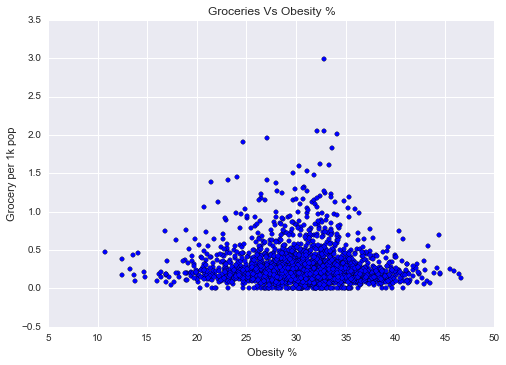

In [11]:
import matplotlib.pyplot as pltFMOb

pltFMOb.xlabel('Obesity %')
pltFMOb.ylabel('Grocery per 1k pop')
pltFMOb.title('Groceries Vs Obesity %')
pltFMOb.scatter(Ob_set['percent 2012'], Ob_set['GROCPTH12'], label="training points")

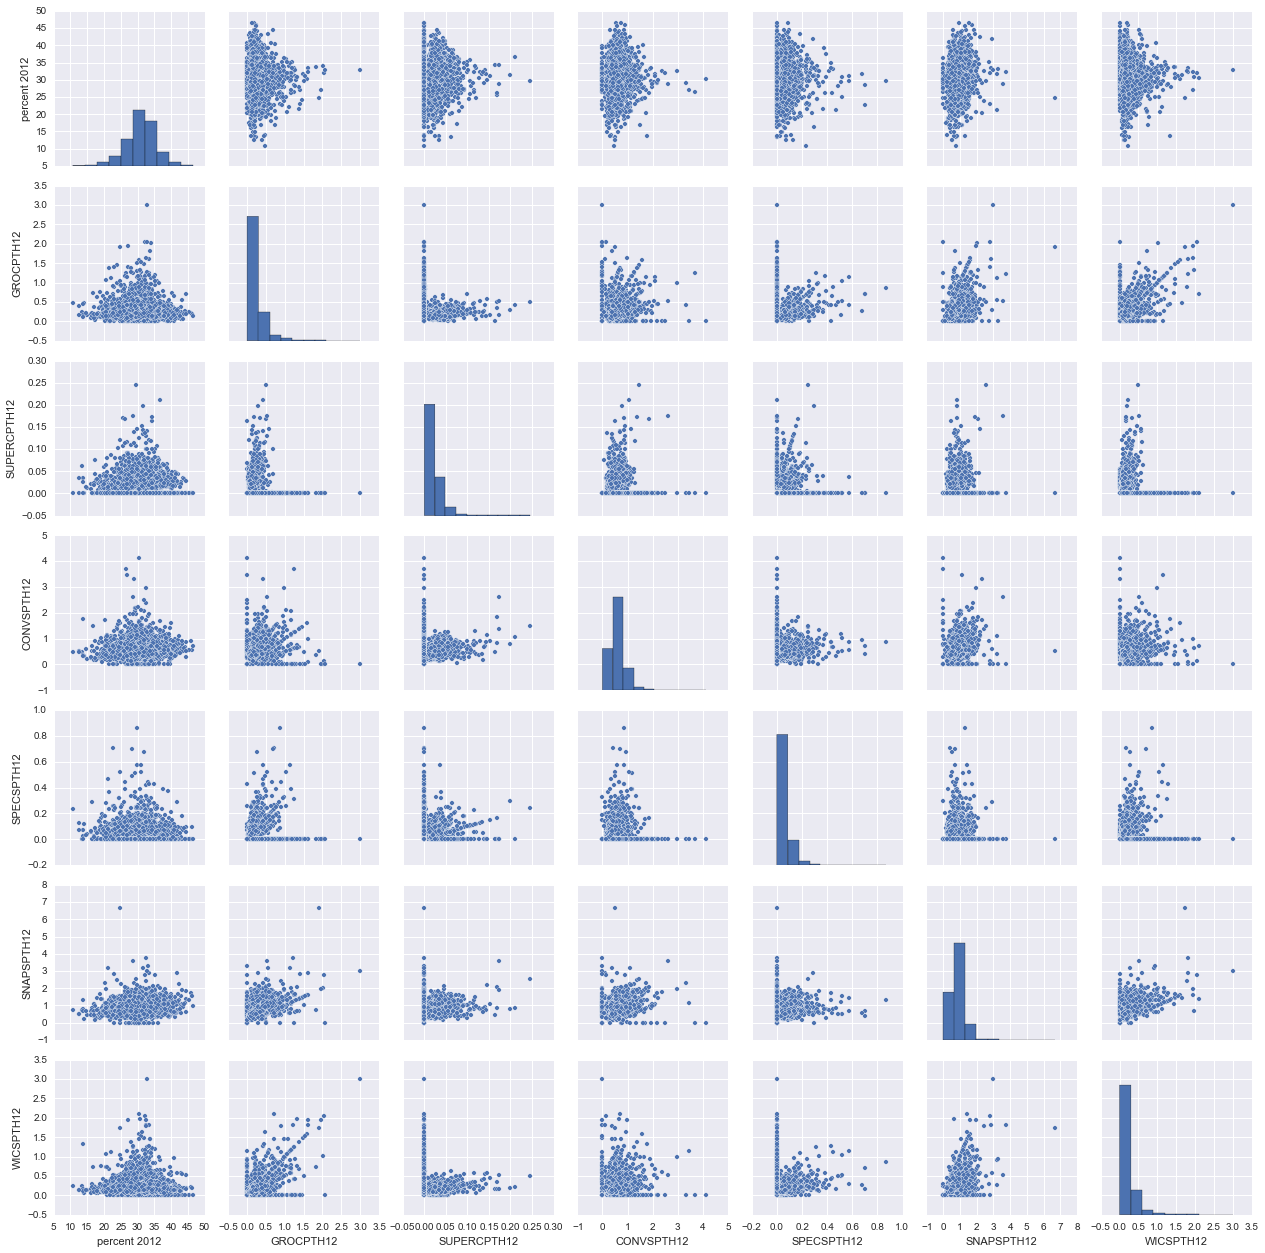

In [12]:
sns.pairplot(Ob_set, size=2.5,vars=Ob_set[['percent 2012','GROCPTH12','SUPERCPTH12','CONVSPTH12','SPECSPTH12','SNAPSPTH12','WICSPTH12']])

In [ ]:
#Change all the Nan values in the Famers count to 0
Ob_set['FarmersMkts Per County'] = Ob_set['FarmersMkts Per County'].fillna(int(0))
#Change all the Farmers market vals to ints
Ob_set['FarmersMkts Per County'] = Ob_set['FarmersMkts Per County'].astype(int)

In [13]:
Ob_set.head()

,State,FIPS Codes,County,number 2004,percent 2004,number 2005,percent 2005,number 2006,percent 2006,number 2007,...,number 2011,percent 2011,number 2012,percent 2012,GROCPTH12,SUPERCPTH12,CONVSPTH12,SPECSPTH12,SNAPSPTH12,WICSPTH12
0,Alabama,1001,Autauga,10180,30.2,10050,28.87,9912,27.9,10640,...,12340,31.3,12184,30.9,0.072054,0.018013,0.612458,0.000000,0.674004,0.090067
1,Alabama,1003,Baldwin,30120,25.7,30710,25.11,30460,23.9,31240,...,35005,25.0,38245,26.7,0.136275,0.031448,0.566067,0.120551,0.725055,0.141517
2,Alabama,1005,Barbour,6645,31.7,6972,33.04,7595,36.5,7591,...,8021,38.4,8482,40.8,0.183817,0.036763,0.698504,0.110290,1.280590,0.257344
3,Alabama,1007,Bibb,4605,29.3,4910,30.79,4972,31.3,5062,...,6423,37.3,6926,40.1,0.221268,0.044254,0.752312,0.044254,0.719122,0.221268
4,Alabama,1009,Blount,10330,25.5,11450,27.67,12080,28.9,13120,...,13073,30.9,13789,32.4,0.138346,0.017293,0.484211,0.000000,0.657144,0.103760


In [19]:
FoodSecRest = pd.read_excel("FoodSecAllup.xls", 'RESTAURANTS')

In [20]:
FoodSecRest.head()

,FIPS,State,County,FFR07,FFR12,PCH_FFR_07_12,FFRPTH07,FFRPTH12,PCH_FFRPTH_07_12,FSR07,FSR12,PCH_FSR_07_12,FSRPTH07,FSRPTH12,PCH_FSRPTH_07_12,PC_FFRSALES02,PC_FFRSALES07,PC_FSRSALES02,PC_FSRSALES07
0,1001,Alabama,Autauga,32,34,6.250000,0.642132,0.612458,-4.621132,34,29,-14.705882,0.682265,0.522391,-23.432881,470,649.511367,349,484.381507
1,1003,Alabama,Baldwin,129,130,0.775194,0.746463,0.681377,-8.719193,184,211,14.673913,1.064722,1.105928,3.870079,470,649.511367,349,484.381507
2,1005,Alabama,Barbour,20,21,5.000000,0.672585,0.772030,14.785486,11,14,27.272727,0.369922,0.514687,39.133922,470,649.511367,349,484.381507
3,1007,Alabama,Bibb,8,6,-25.000000,0.372353,0.265522,-28.690755,8,4,-50.000000,0.372353,0.177015,-52.460504,470,649.511367,349,484.381507
4,1009,Alabama,Blount,27,22,-18.518519,0.474800,0.380452,-19.871236,14,13,-7.142857,0.246193,0.224812,-8.684428,470,649.511367,349,484.381507


In [22]:
#Kcols = [col for col in FoodSecRest.columns if 'PTH12' in col]
FoodSecRest2 = FoodSecRest[['FIPS','FFRPTH12','FSRPTH12','FSR12']]
FoodSecRest2.head()

,FIPS,FFRPTH12,FSRPTH12,FSR12
0,1001,0.612458,0.522391,29
1,1003,0.681377,1.105928,211
2,1005,0.772030,0.514687,14
3,1007,0.265522,0.177015,4
4,1009,0.380452,0.224812,13


In [23]:
Ob_set = pd.merge(Ob_set, FoodSecRest2, how='left', left_on='FIPS Codes',right_on ='FIPS',left_index=True, right_index=True, sort=True, copy=True)
Ob_set.describe()

,FIPS Codes,number 2004,percent 2004,number 2005,percent 2005,number 2006,percent 2006,number 2007,percent 2007,number 2008,...,GROCPTH12,SUPERCPTH12,CONVSPTH12,SPECSPTH12,SNAPSPTH12,WICSPTH12,FIPS,FFRPTH12,FSRPTH12,FSR12
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,...,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,30435.328553,15658.998783,25.279764,16362.079031,26.174576,17298.036606,27.458604,18033.087581,28.282664,18709.140293,...,0.256407,0.018025,0.598790,0.050462,0.880551,0.230512,30400.979286,0.578932,0.791699,73.828553
std,15134.945712,45183.715792,3.245405,46406.136789,3.395485,48559.077368,3.568106,51115.995724,3.626874,53095.591310,...,0.218283,0.022848,0.306909,0.068030,0.387631,0.211875,15137.944816,0.304128,0.592559,244.165289
min,1001.000000,10.220000,12.300000,12.000000,11.730000,13.030000,12.600000,11.840000,12.500000,10.430000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000
25%,19001.500000,2128.000000,23.900000,2218.750000,24.820000,2307.500000,26.000000,2346.750000,26.700000,2382.500000,...,0.143688,0.000000,0.407746,0.000000,0.630095,0.118912,18181.500000,0.415119,0.501374,7.000000
50%,29182.000000,4810.500000,25.400000,5053.500000,26.250000,5345.000000,27.600000,5492.500000,28.500000,5656.000000,...,0.196930,0.014118,0.552360,0.036776,0.819484,0.177364,29178.000000,0.583571,0.682165,17.000000
75%,45084.500000,11730.000000,26.900000,12385.000000,28.000000,13167.500000,29.400000,13737.500000,30.200000,14297.500000,...,0.289521,0.028545,0.726832,0.074817,1.067149,0.268149,45080.500000,0.731938,0.911369,49.000000
max,56045.000000,1341000.000000,38.000000,1332000.000000,38.950000,1363000.000000,41.900000,1428000.000000,43.500000,1461000.000000,...,2.994012,0.245821,4.132231,0.865426,6.658001,2.994012,56041.000000,5.797101,13.043478,7204.000000


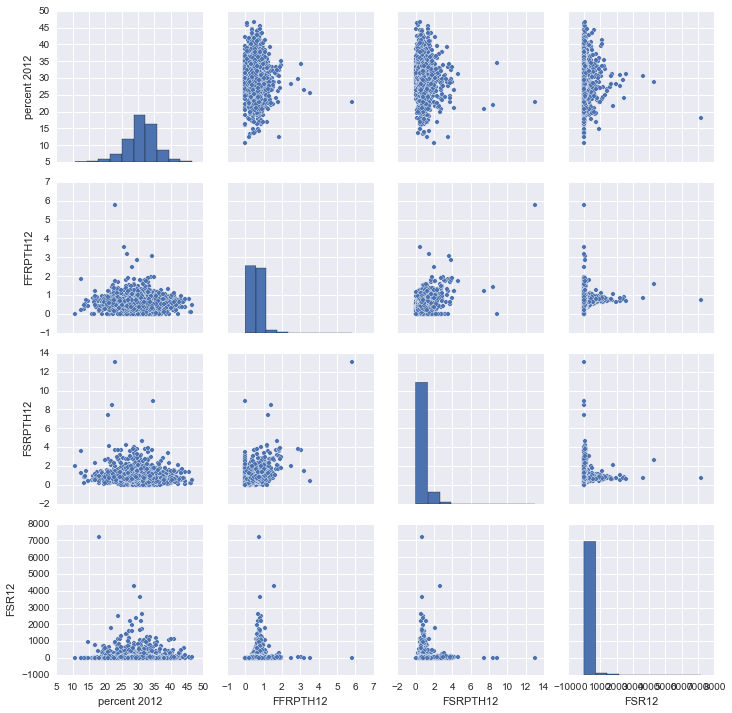

In [24]:
sns.pairplot(Ob_set, size=2.5,vars=Ob_set[['percent 2012','FFRPTH12','FSRPTH12','FSR12']])